In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [4]:
print(type(gdp_df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
del gdp_df['Value Footnotes']

In [7]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [8]:
countries_with_all_years = gdp_df.groupby('Country or Area').filter(lambda x: len(x) == gdp_df['Year'].nunique())['Country or Area'].unique()
num_countries_with_all_years = len(countries_with_all_years)
print(f"Number of countries with data for all years: {num_countries_with_all_years}")


Number of countries with data for all years: 202


In [10]:
countries_missing_data = gdp_df.groupby('Country or Area').filter(lambda x: len(x) < gdp_df['Year'].nunique())['Country or Area'].unique()
print("Countries missing many years of data:")
for country in countries_missing_data:
    missing_years = gdp_df.loc[gdp_df['Country or Area'] == country, 'Year'].nunique()
    print(f"{country}: {missing_years}/{gdp_df['Year'].nunique()} years")



Countries missing many years of data:
Afghanistan: 20/33 years
Aruba: 32/33 years
Bhutan: 32/33 years
Bosnia and Herzegovina: 29/33 years
Cambodia: 30/33 years
Cayman Islands: 16/33 years
Croatia: 28/33 years
CuraÃ§ao: 22/33 years
Djibouti: 10/33 years
Estonia: 28/33 years
Hungary: 32/33 years
Iceland: 28/33 years
Israel: 28/33 years
Kosovo: 15/33 years
Kuwait: 31/33 years
Latvia: 28/33 years
Lebanon: 32/33 years
Liberia: 23/33 years
Libya: 24/33 years
Lithuania: 28/33 years
Maldives: 28/33 years
Moldova: 28/33 years
Montenegro: 26/33 years
Nauru: 19/33 years
Other small states: 23/33 years
Palau: 22/33 years
Qatar: 23/33 years
SÃ£o TomÃ© and Principe: 22/33 years
San Marino: 25/33 years
Serbia: 28/33 years
Sint Maarten (Dutch part): 14/33 years
Slovak Republic: 31/33 years
Slovenia: 28/33 years
Small states: 26/33 years
Somalia: 10/33 years
Timor-Leste: 23/33 years
Tonga: 32/33 years
Turkmenistan: 31/33 years
Turks and Caicos Islands: 12/33 years
West Bank and Gaza: 29/33 years


In [11]:
observations_per_year = gdp_df.groupby('Year').size()
print("Number of observations per year:")
print(observations_per_year)

Number of observations per year:
Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020

In [19]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]


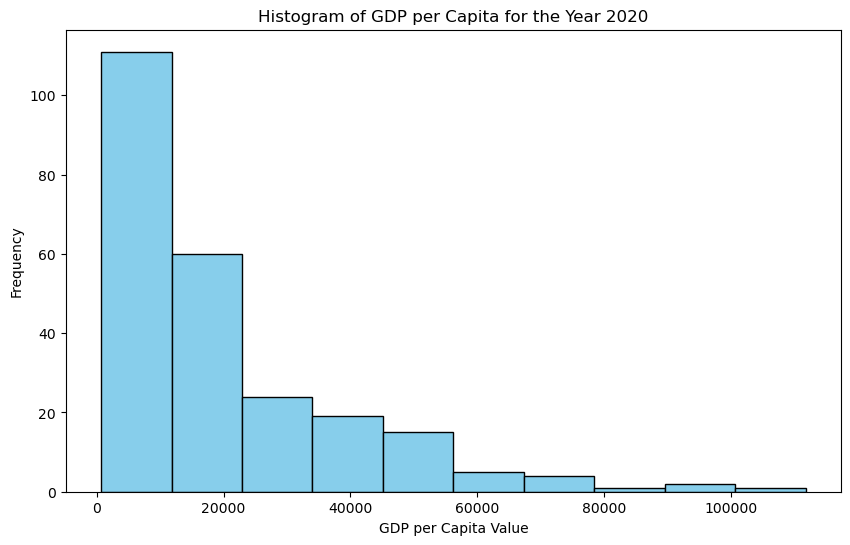

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(gdp_2020['Value'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('GDP per Capita Value')
plt.ylabel('Frequency')
plt.title('Histogram of GDP per Capita for the Year 2020')
plt.show()

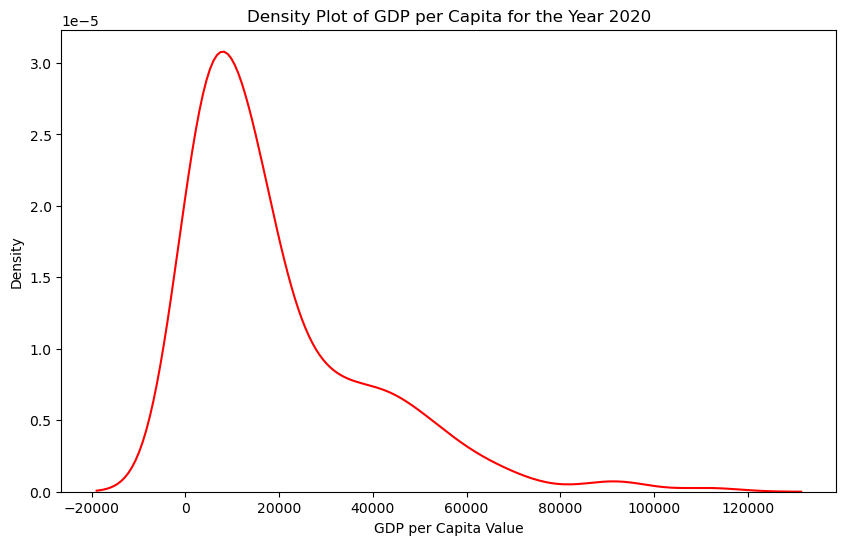

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(gdp_2020['Value'], color='red')
plt.xlabel('GDP per Capita Value')
plt.ylabel('Density')
plt.title('Density Plot of GDP per Capita for the Year 2020')
plt.show()

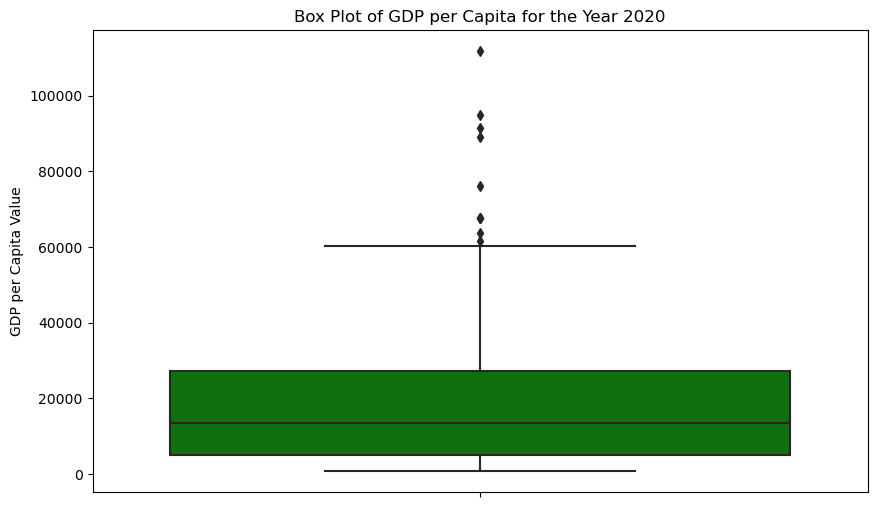

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=gdp_2020['Value'], color='green')
plt.ylabel('GDP per Capita Value')
plt.title('Box Plot of GDP per Capita for the Year 2020')
plt.show()

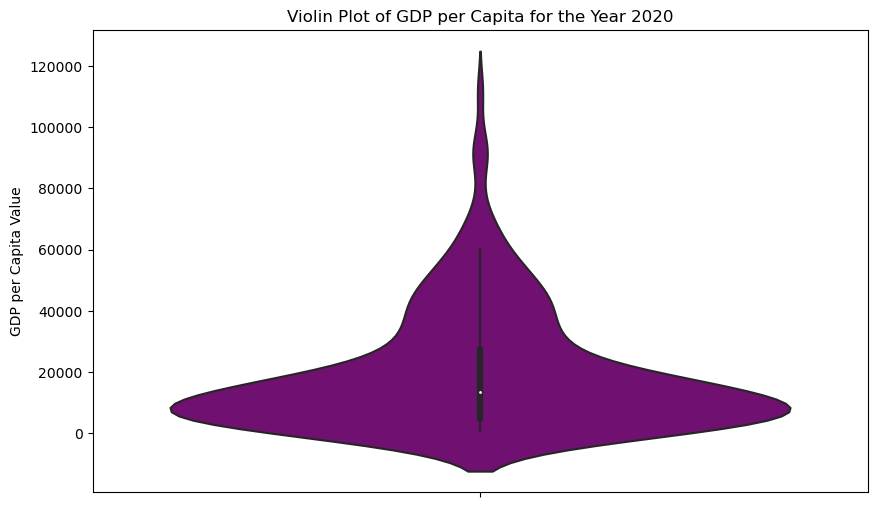

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=gdp_2020['Value'], color='purple')
plt.ylabel('GDP per Capita Value')
plt.title('Violin Plot of GDP per Capita for the Year 2020')
plt.show()

Density plot includes negative values.

9. What was the median GDP per capita value in 2020?

In [26]:
median_gdp_per_capita = gdp_2020['Value'].median()
print(f"The median GDP per capita value in 2020 was: {median_gdp_per_capita}")

The median GDP per capita value in 2020 was: 13357.997573370474


10. GDP per capita values for the years 1990, 2000, 2010, and 2020

In [27]:
years_of_interest = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df[gdp_df['Year'].isin(years_of_interest)]
print(gdp_decades.head())

                Country or Area  Year        Value
1                   Afghanistan  2020  1968.341002
11                  Afghanistan  2010  2026.163818
22  Africa Eastern and Southern  2020  3455.023119
32  Africa Eastern and Southern  2010  3513.315920
42  Africa Eastern and Southern  2000  2897.140841


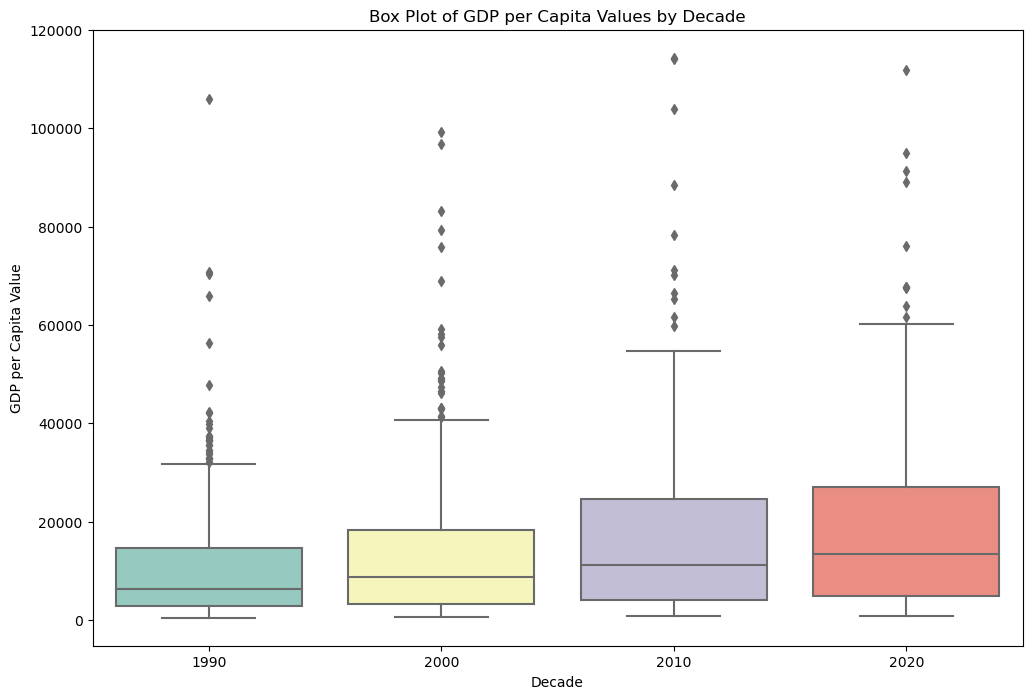

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Value', data=gdp_decades, palette='Set3')
plt.xlabel('Decade')
plt.ylabel('GDP per Capita Value')
plt.title('Box Plot of GDP per Capita Values by Decade')
plt.show()

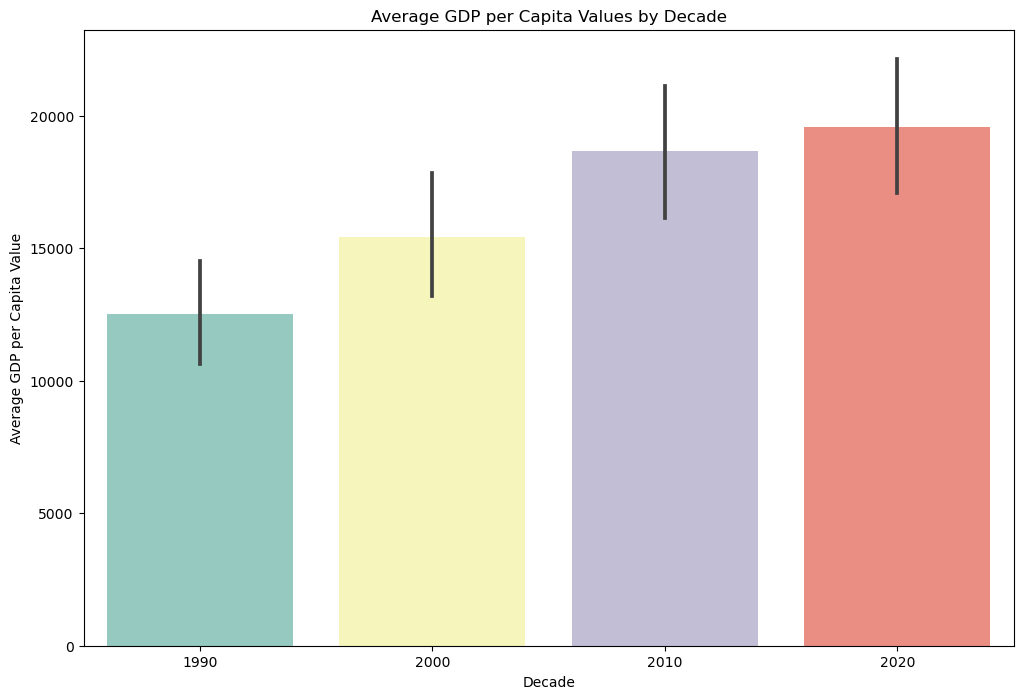

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Value', data=gdp_decades, palette='Set3')
plt.xlabel('Decade')
plt.ylabel('Average GDP per Capita Value')
plt.title('Average GDP per Capita Values by Decade')
plt.show()

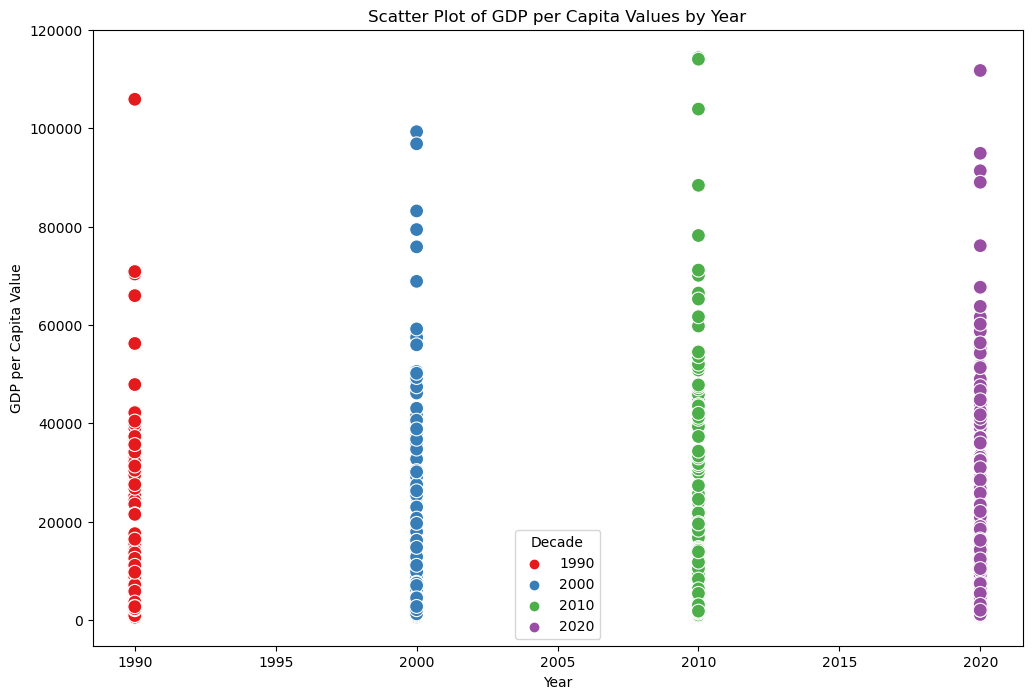

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='Value', data=gdp_decades, hue='Year', palette='Set1', s=100)
plt.xlabel('Year')
plt.ylabel('GDP per Capita Value')
plt.title('Scatter Plot of GDP per Capita Values by Year')
plt.legend(title='Decade')
plt.show()

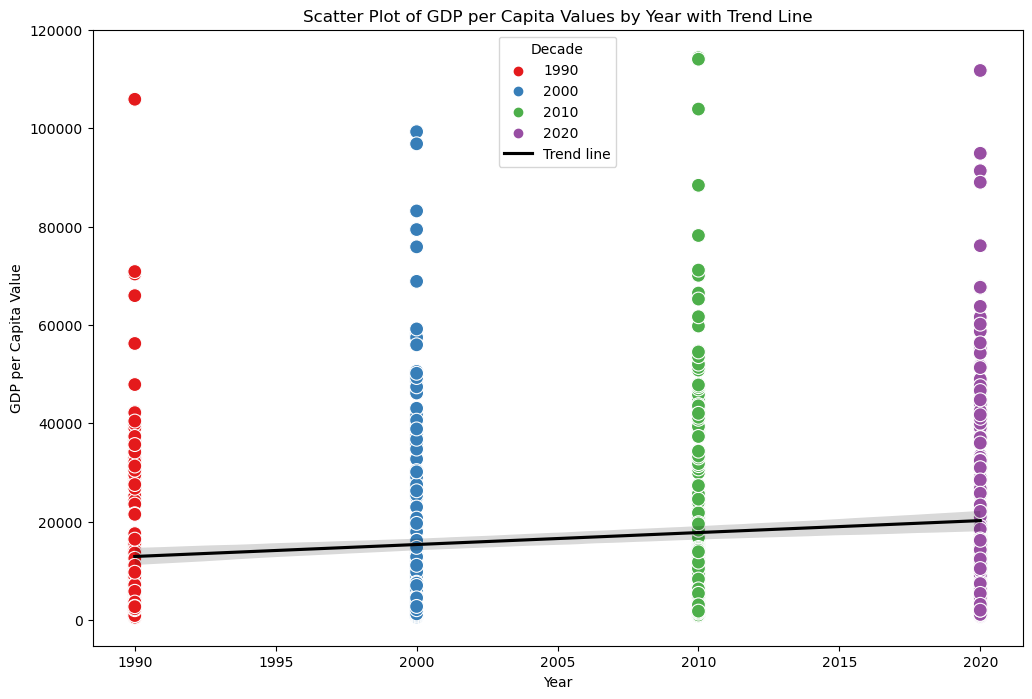

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='Value', data=gdp_decades, hue='Year', palette='Set1', s=100)
sns.regplot(x='Year', y='Value', data=gdp_decades, scatter=False, color='black', label='Trend line')
plt.xlabel('Year')
plt.ylabel('GDP per Capita Value')
plt.title('Scatter Plot of GDP per Capita Values by Year with Trend Line')
plt.legend(title='Decade')
plt.show()

Values have increased overtime, the bar plot is the most effective in demonstrating the increase.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [33]:
high_gdp_countries = gdp_df[gdp_df['Value'] > 100000]
earliest_high_gdp_countries = high_gdp_countries.groupby('Country or Area')['Year'].min()
earliest_country = earliest_high_gdp_countries.idxmin()
print(f"The first country to have a GDP per capita greater than $100,000 was: {earliest_country}")

The first country to have a GDP per capita greater than $100,000 was: United Arab Emirates


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [38]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
highest_gdp_country_2020 = gdp_2020.loc[gdp_2020['Value'].idxmax(), 'Country or Area']
print(f"The country with the highest GDP per capita in 2020 was: {highest_gdp_country_2020}")

The country with the highest GDP per capita in 2020 was: Luxembourg


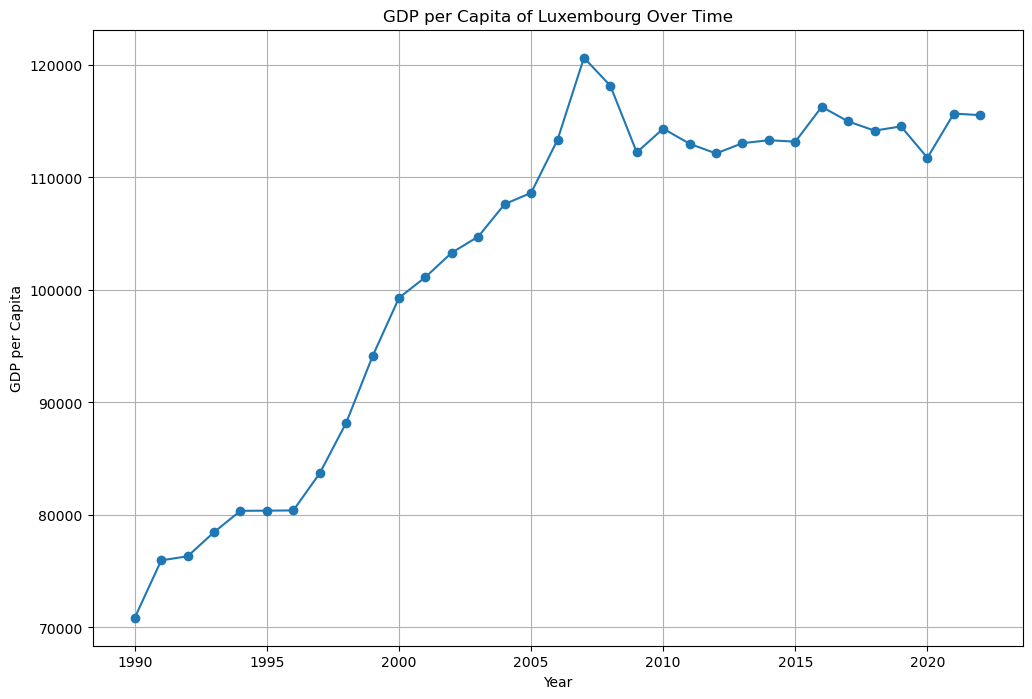

In [39]:
highest_gdp_country_data = gdp_df[gdp_df['Country or Area'] == highest_gdp_country_2020]
plt.figure(figsize=(12, 8))
plt.plot(highest_gdp_country_data['Year'], highest_gdp_country_data['Value'], marker='o')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title(f'GDP per Capita of {highest_gdp_country_2020} Over Time')
plt.grid(True)
plt.show()
